# CSE -221710302064 - Vishnu Pulipaka

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/iris.csv")
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Get the frequency of the output categories and visualize it 


In [6]:
df.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

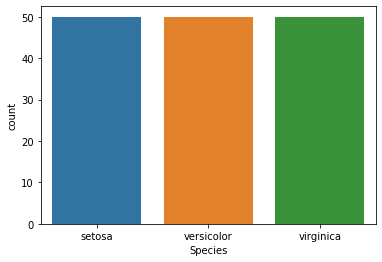

In [7]:
sns.countplot(df.Species)

## Apply the Decision Tree Algorithm and Visualize the Decision Tree


In [8]:
X=df.drop('Species',axis=1)
y=df.Species

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='entropy')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
y_train_pred=dtree.predict(X_train)
y_train_pred

array(['versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 's

## Compare the performance of training scores and testing scores and check whether the model is overfitting to the data


In [13]:
# classification report on training data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        39
  versicolor       1.00      1.00      1.00        37
   virginica       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [14]:
y_test_pred=dtree.predict(X_test)

In [15]:
# classification report on testing data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [22]:
from sklearn import tree

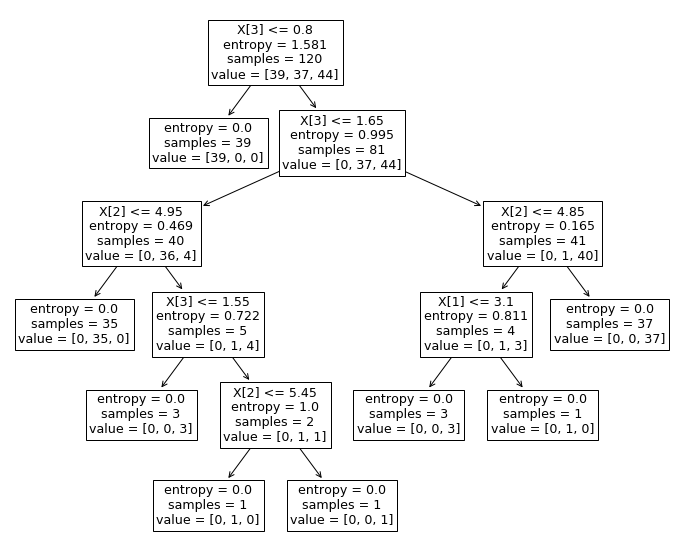

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
tree.plot_tree(dtree)
plt.show()

## In order to overcome OverFitting, apply some hyper parameter tuning  with help of GridSearch and build the model with the best parameters given by GridSearch


In [24]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth': range(2,10,1),
    'min_samples_leaf' : range(1,10,1)}

In [25]:
from sklearn.model_selection import GridSearchCV
g_search = GridSearchCV(estimator = dtree,param_grid = grid_param)
g_search.fit(X_train,y_train)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                 

In [26]:
g_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}

In [27]:
# We got best parmaters
# initializing DT Classifier
clf = DecisionTreeClassifier(criterion = 'gini', max_depth= 6, min_samples_leaf= 1)
# We need to fit model on data
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
# Prediction on test data
pred_test = clf.predict(X_test)

In [29]:
#Classification report for test data
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

